# Chapter 2 - Neighbors and Neighborhoods

## Neighbors in Undirected Graphs

---

Exploratory:

In [1]:
sample_space = set()
sample_space

set()

In [2]:
type(sample_space)

set

In [3]:
# Different:
not_a_set = {}
not_a_set

{}

In [4]:
type(not_a_set)

dict

In [5]:
sample_space.add('H')
sample_space.add('T')
sample_space

{'H', 'T'}

**Note:** It's `add`, not `append`.

In [6]:
# Alt way to create the above set:
sample_space = {'H', 'T'}
sample_space

{'H', 'T'}

In [7]:
# We can easily convert a dict's keys to a set.
hash_map = {'a': 1, 'b': 2, 'c': 3}
set(hash_map.keys())

{'a', 'b', 'c'}

---

We can add a short helper function to our `Node` class to compute the set of neighbors in an undirected graph.

In [8]:
class Edge:
    def __init__(self, from_node: int, to_node: int, weight: float):
        self.from_node = from_node
        self.to_node = to_node
        self.weight = weight

In [9]:
from typing import Optional, Union

# Added the `get_neighbors` method; for use with undirected graphs.
class Node:
    def __init__(self, index: int, label: Optional[Union[int, str, object]] = None):
        self.index = index
        self.label = label
        self.edges = {}

    def num_edges(self) -> int:
        return len(self.edges)

    def get_edge(self, neighbor: int) -> Union[Edge, None]:
        if neighbor in self.edges:
            return self.edges[neighbor]
        return None

    def add_edge(self, neighbor: int, weight: float):
        self.edges[neighbor] = Edge(self.index, neighbor, weight)

    def remove_edge(self, neighbor: int):
        if neighbor in self.edges:
            del self.edges[neighbor]

    def get_edge_list(self) -> list:
        return list(self.edges.values())

    def get_sorted_edge_list(self) -> list:
        result = []
        neighbors = list(self.edges.keys())
        neighbors.sort()
        for n in neighbors:
            result.append(self.edges[n])
        return result

    # def get_neighbors(self) -> set:
    #     neighbors = set()
    #     for edge in self.edges.values():
    #         neighbors.add(edge.to_node)
    #     return neighbors

    def get_neighbors(self) -> set:
        return set(self.edges.keys())

To test the `get_neighbors` method, let's create the undirected graph in Figure 2-1, and then call `get_neighbors` on each of its nodes.

In [10]:
class Graph:
    def __init__(self, num_nodes: int, undirected: bool = False):
        self.num_nodes = num_nodes
        self.undirected = undirected
        self.nodes = [Node(j) for j in range(num_nodes)]
        # Note: The index of a particular item in the above list will match the index attribute of the corresponding `Node` object.

    def get_edge(self, from_node: int, to_node: int) -> Union[Edge, None]:
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        return self.nodes[from_node].get_edge(to_node) # This will return `None` if an edge from `from_node` to `to_node` doesn't exist.

    def is_edge(self, from_node: int, to_node: int) -> bool:
        return self.get_edge(from_node, to_node) is not None

    def make_edge_list(self) -> list:
        all_edges = []
        for node in self.nodes:
            all_edges.extend(node.get_edge_list())
        return all_edges

    def insert_edge(self, from_node: int, to_node: int, weight: float):
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        self.nodes[from_node].add_edge(to_node, weight)
        if self.undirected:
            self.nodes[to_node].add_edge(from_node, weight)

    def remove_edge(self, from_node: int, to_node: int):
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        self.nodes[from_node].remove_edge(to_node)
        if self.undirected:
            self.nodes[to_node].remove_edge(from_node)

    def insert_node(self, label: Optional[Union[int, str, object]] = None) -> Node:
        new_node = Node(self.num_nodes, label=label)
        self.nodes.append(new_node)
        self.num_nodes += 1
        return new_node

    def make_copy(self):
        g2 = Graph(self.num_nodes, self.undirected) # Note: We're instantiating a `Graph` object from within the `Graph` class.
        for node in self.nodes:
            g2.nodes[node.index].label = node.label
            for edge in node.get_edge_list():
                g2.insert_edge(edge.from_node, edge.to_node, edge.weight)
        return g2

    # Just for an experiment; no need to include this method for undirected graphs:
    def get_in_neighbors(self, target: int) -> set:
        neighbors = set()
        for node in self.nodes:
            if target in node.edges:
                neighbors.add(node.index)
        return neighbors

In [11]:
undirected_g = Graph(num_nodes=6, undirected=True)
undirected_g.insert_edge(0, 1, 1.0)
undirected_g.insert_edge(0, 3, 1.0)
undirected_g.insert_edge(0, 4, 1.0)
# undirected_g.insert_edge(1, 0, 1.0)
undirected_g.insert_edge(1, 2, 1.0)
undirected_g.insert_edge(1, 4, 1.0)
# undirected_g.insert_edge(2, 1, 1.0)
undirected_g.insert_edge(2, 4, 1.0)
undirected_g.insert_edge(2, 5, 1.0)
# undirected_g.insert_edge(3, 0, 1.0)
# undirected_g.insert_edge(4, 0, 1.0)
# undirected_g.insert_edge(4, 1, 1.0)
# undirected_g.insert_edge(4, 2, 1.0)
undirected_g.insert_edge(4, 5, 1.0)
# undirected_g.insert_edge(5, 2, 1.0)
# undirected_g.insert_edge(5, 4, 1.0)

**Note:** The commented lines aren't needed, because the `insert_edge` method of the `Graph` class takes care of inserting the corresponding *inverse edge* (in the case of an undirected graph). Notice that in the commented lines, the `to_node` argument has a lesser value than the `from_node` argument.

In [12]:
# Test:
print(undirected_g.nodes[0].get_neighbors())
print(undirected_g.nodes[1].get_neighbors())
print(undirected_g.nodes[2].get_neighbors())
print(undirected_g.nodes[3].get_neighbors())
print(undirected_g.nodes[4].get_neighbors())
print(undirected_g.nodes[5].get_neighbors())

{1, 3, 4}
{0, 2, 4}
{1, 4, 5}
{0}
{0, 1, 2, 5}
{2, 4}


The method works!

## Neighbors in Directed Graphs

In [13]:
# Added the `get_out_neighbors` method; for use with directed graphs.
class Node:
    def __init__(self, index: int, label: Optional[Union[int, str, object]] = None):
        self.index = index
        self.label = label
        self.edges = {}

    def num_edges(self) -> int:
        return len(self.edges)

    def get_edge(self, neighbor: int) -> Union[Edge, None]:
        if neighbor in self.edges:
            return self.edges[neighbor]
        return None

    def add_edge(self, neighbor: int, weight: float):
        self.edges[neighbor] = Edge(self.index, neighbor, weight)

    def remove_edge(self, neighbor: int):
        if neighbor in self.edges:
            del self.edges[neighbor]

    def get_edge_list(self) -> list:
        return list(self.edges.values())

    def get_sorted_edge_list(self) -> list:
        result = []
        neighbors = list(self.edges.keys())
        neighbors.sort()
        for n in neighbors:
            result.append(self.edges[n])
        return result

    def get_out_neighbors(self) -> set:
        return set(self.edges.keys())

In [14]:
# Added the `get_in_neighbors` method; for use with directed graphs.
class Graph:
    def __init__(self, num_nodes: int, undirected: bool = False):
        self.num_nodes = num_nodes
        self.undirected = undirected
        self.nodes = [Node(j) for j in range(num_nodes)]
        # Note: The index of a particular item in the above list will match the index attribute of the corresponding `Node` object.

    def get_edge(self, from_node: int, to_node: int) -> Union[Edge, None]:
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        return self.nodes[from_node].get_edge(to_node) # This will return `None` if an edge from `from_node` to `to_node` doesn't exist.

    def is_edge(self, from_node: int, to_node: int) -> bool:
        return self.get_edge(from_node, to_node) is not None

    def make_edge_list(self) -> list:
        all_edges = []
        for node in self.nodes:
            all_edges.extend(node.get_edge_list())
        return all_edges

    def insert_edge(self, from_node: int, to_node: int, weight: float):
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        self.nodes[from_node].add_edge(to_node, weight)
        if self.undirected:
            self.nodes[to_node].add_edge(from_node, weight)

    def remove_edge(self, from_node: int, to_node: int):
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        self.nodes[from_node].remove_edge(to_node)
        if self.undirected:
            self.nodes[to_node].remove_edge(from_node)

    def insert_node(self, label: Optional[Union[int, str, object]] = None) -> Node:
        new_node = Node(self.num_nodes, label=label)
        self.nodes.append(new_node)
        self.num_nodes += 1
        return new_node

    def make_copy(self):
        g2 = Graph(self.num_nodes, self.undirected) # Note: We're instantiating a `Graph` object from within the `Graph` class.
        for node in self.nodes:
            g2.nodes[node.index].label = node.label
            for edge in node.get_edge_list():
                g2.insert_edge(edge.from_node, edge.to_node, edge.weight)
        return g2

    def get_in_neighbors(self, target: int) -> set: # `target` is the node from whose perspective we want to find the in-neighbors.
        neighbors = set()
        for node in self.nodes:
            if target in node.edges:
                neighbors.add(node.index)
        return neighbors

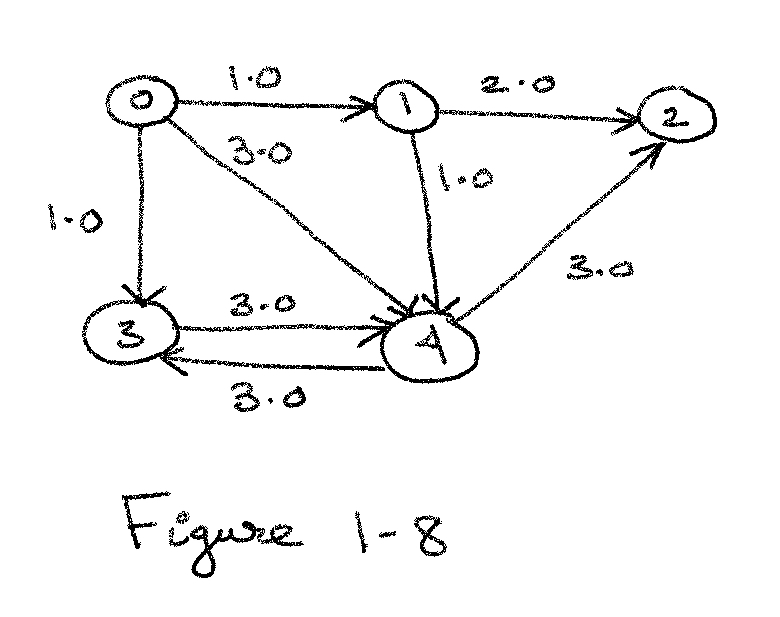

To understand the `get_in_neighbors` method, let's refer to the graph in Figure 1-8. Let's say we want the in-neighbors of the `4` node. Looking at the graph, we see that it's the set `{0, 1, 3}`. But if we go to the `4` node, we'll only get its out-neighbors `{2, 3}` from its `edges` attribute. How do we algorithmically obtain the in-neighbors of the `4` node?

Well, we need to iterate through each node in the graph, and check whether the index of the target node (i.e., `4`) is in the `edges` attribute of that node. (This is because an outgoing edge from the perspective of another node to the `4` node is an incoming edge from the perspective of the `4` node.) For example, for the `0` node, `4` is in its `edges` attribute, whereas for the `2` node, `4` isn't in its `edges` attribute. If `4` is in the `edges` attribute of the current node, then we add the index of the current node to the `neighbors` set.

To test the `get_out_neighbors` and `get_in_neighbors` methods, let's create the directed graph in Figure 1-8, and then call these methods on each of its nodes.

In [15]:
directed_g = Graph(num_nodes=5, undirected=False)
directed_g.insert_edge(0, 1, 1.0)
directed_g.insert_edge(0, 3, 1.0)
directed_g.insert_edge(0, 4, 3.0)
directed_g.insert_edge(1, 2, 2.0)
directed_g.insert_edge(1, 4, 1.0)
directed_g.insert_edge(3, 4, 3.0)
directed_g.insert_edge(4, 2, 3.0)
directed_g.insert_edge(4, 3, 3.0)

In [16]:
# Test:
print(directed_g.nodes[0].get_out_neighbors())
print(directed_g.nodes[1].get_out_neighbors())
print(directed_g.nodes[2].get_out_neighbors())
print(directed_g.nodes[3].get_out_neighbors())
print(directed_g.nodes[4].get_out_neighbors())

{1, 3, 4}
{2, 4}
set()
{4}
{2, 3}


In [17]:
# Test:
print(directed_g.get_in_neighbors(0))
print(directed_g.get_in_neighbors(1))
print(directed_g.get_in_neighbors(2))
print(directed_g.get_in_neighbors(3))
print(directed_g.get_in_neighbors(4))

set()
{0}
{1, 4}
{0, 4}
{0, 1, 3}


The methods work!

As an experiment, let's try running `get_in_neighbors` on `undirected_g`.

In [18]:
# For reference, the output of `get_neighbors` was:
# {1, 3, 4}
# {0, 2, 4}
# {1, 4, 5}
# {0}
# {0, 1, 2, 5}
# {2, 4}

In [19]:
print(undirected_g.get_in_neighbors(0))
print(undirected_g.get_in_neighbors(1))
print(undirected_g.get_in_neighbors(2))
print(undirected_g.get_in_neighbors(3))
print(undirected_g.get_in_neighbors(4))
print(undirected_g.get_in_neighbors(5))

{1, 3, 4}
{0, 2, 4}
{1, 4, 5}
{0}
{0, 1, 2, 5}
{2, 4}


**Note:** In this book, we're representing edges in undirected graphs with a pair of directed edges (one outgoing and one incoming). Our `get_neighbors` method gets the indices of neighbors from the outgoing edges. But the above experiment works as well; it just gets the indices of neighbors from the incoming edges. This is significantly less efficient (as noted in the book).

## Self-Loops

## Degree

---

Exploratory:

In [20]:
# Reminder:
sample_space

{'H', 'T'}

In [21]:
# Cardinality:
len(sample_space)

2

---

## Clustering Coefficient

In [22]:
def clustering_coefficient(g: Graph, ind: int) -> float:
    neighbors = g.nodes[ind].get_neighbors()
    num_neighbors = len(neighbors)
    total_possible = (num_neighbors * (num_neighbors - 1)) / 2.0
    if total_possible == 0.0:
        return 0.0
    count = 0
    for n in neighbors:
        for edge in g.nodes[n].get_edge_list():
            if edge.to_node > edge.from_node and edge.to_node in neighbors:
                count += 1
    return count / total_possible

In [23]:
# Test:
for node in range(6):
    print(clustering_coefficient(undirected_g, node))

0.3333333333333333
0.6666666666666666
0.6666666666666666
0.0
0.5
1.0


The function works!

In [24]:
def ave_clustering_coefficient(g: Graph) -> float:
    if g.num_nodes == 0:
        return 0.0
    total = 0.0
    for n in range(g.num_nodes):
        total += clustering_coefficient(g, n)
    return total / g.num_nodes

In [25]:
# Test:
ave_clustering_coefficient(undirected_g)

0.5277777777777778

## Generating Neighborhood Subgraphs

In [26]:
# Back to the `Node` class for use with undirected graphs (with a `get_neighbors` method).
class Node:
    def __init__(self, index: int, label: Optional[Union[int, str, object]] = None):
        self.index = index
        self.label = label
        self.edges = {}

    def num_edges(self) -> int:
        return len(self.edges)

    def get_edge(self, neighbor: int) -> Union[Edge, None]:
        if neighbor in self.edges:
            return self.edges[neighbor]
        return None

    def add_edge(self, neighbor: int, weight: float):
        self.edges[neighbor] = Edge(self.index, neighbor, weight)

    def remove_edge(self, neighbor: int):
        if neighbor in self.edges:
            del self.edges[neighbor]

    def get_edge_list(self) -> list:
        return list(self.edges.values())

    def get_sorted_edge_list(self) -> list:
        result = []
        neighbors = list(self.edges.keys())
        neighbors.sort()
        for n in neighbors:
            result.append(self.edges[n])
        return result

    def get_neighbors(self) -> set:
        return set(self.edges.keys())

In [27]:
# Added the `make_undirected_neighborhood_subgraph` method; for use with undirected graphs.
class Graph:
    def __init__(self, num_nodes: int, undirected: bool = False):
        self.num_nodes = num_nodes
        self.undirected = undirected
        self.nodes = [Node(j) for j in range(num_nodes)]
        # Note: The index of a particular item in the above list will match the index attribute of the corresponding `Node` object.

    def get_edge(self, from_node: int, to_node: int) -> Union[Edge, None]:
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        return self.nodes[from_node].get_edge(to_node) # This will return `None` if an edge from `from_node` to `to_node` doesn't exist.

    def is_edge(self, from_node: int, to_node: int) -> bool:
        return self.get_edge(from_node, to_node) is not None

    def make_edge_list(self) -> list:
        all_edges = []
        for node in self.nodes:
            all_edges.extend(node.get_edge_list())
        return all_edges

    def insert_edge(self, from_node: int, to_node: int, weight: float):
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        self.nodes[from_node].add_edge(to_node, weight)
        if self.undirected:
            self.nodes[to_node].add_edge(from_node, weight)

    def remove_edge(self, from_node: int, to_node: int):
        if from_node < 0 or from_node >= self.num_nodes:
            raise IndexError
        if to_node < 0 or to_node >= self.num_nodes:
            raise IndexError
        self.nodes[from_node].remove_edge(to_node)
        if self.undirected:
            self.nodes[to_node].remove_edge(from_node)

    def insert_node(self, label: Optional[Union[int, str, object]] = None) -> Node:
        new_node = Node(self.num_nodes, label=label)
        self.nodes.append(new_node)
        self.num_nodes += 1
        return new_node

    def make_copy(self):
        g2 = Graph(self.num_nodes, self.undirected) # Note: We're instantiating a `Graph` object from within the `Graph` class.
        for node in self.nodes:
            g2.nodes[node.index].label = node.label
            for edge in node.get_edge_list():
                g2.insert_edge(edge.from_node, edge.to_node, edge.weight)
        return g2

    def make_undirected_neighborhood_subgraph(self, ind: int, closed: bool):
        if not self.undirected:
            raise ValueError

        nodes_to_use = self.nodes[ind].get_neighbors()
        if closed:
            nodes_to_use.add(ind)

        index_map = {}
        for new_index, old_index in enumerate(nodes_to_use): # Note: It's (obviously) possible to enumerate the elements of a set.
            index_map[old_index] = new_index

        g_new = Graph(len(nodes_to_use), undirected=True)
        for n in nodes_to_use:
            for edge in self.nodes[n].get_edge_list():
                if edge.to_node > edge.from_node and edge.to_node in nodes_to_use:
                    ind1_new = index_map[edge.from_node]
                    ind2_new = index_map[edge.to_node]
                    g_new.insert_edge(ind1_new, ind2_new, edge.weight)
        return g_new

Let's try generating (i) an open neighborhood subgraph and (ii) a closed neighborhood subgraph of node `1` in Figure 2-1.

In [28]:
# Copying from a cell above:
undirected_g = Graph(num_nodes=6, undirected=True)
undirected_g.insert_edge(0, 1, 1.0)
undirected_g.insert_edge(0, 3, 1.0)
undirected_g.insert_edge(0, 4, 1.0)
# undirected_g.insert_edge(1, 0, 1.0)
undirected_g.insert_edge(1, 2, 1.0)
undirected_g.insert_edge(1, 4, 1.0)
# undirected_g.insert_edge(2, 1, 1.0)
undirected_g.insert_edge(2, 4, 1.0)
undirected_g.insert_edge(2, 5, 1.0)
# undirected_g.insert_edge(3, 0, 1.0)
# undirected_g.insert_edge(4, 0, 1.0)
# undirected_g.insert_edge(4, 1, 1.0)
# undirected_g.insert_edge(4, 2, 1.0)
undirected_g.insert_edge(4, 5, 1.0)
# undirected_g.insert_edge(5, 2, 1.0)
# undirected_g.insert_edge(5, 4, 1.0)

In [29]:
open_neighborhood_subgraph = undirected_g.make_undirected_neighborhood_subgraph(1, closed=False)
open_neighborhood_subgraph.num_nodes

3

In [30]:
for node in open_neighborhood_subgraph.nodes:
    print(node.index)
    print("---")
    for edge in node.get_edge_list():
        print(edge.from_node, " ", edge.to_node, " ", edge.weight)
        print("---")
    print("~~~")

0
---
0   2   1.0
---
~~~
1
---
1   2   1.0
---
~~~
2
---
2   0   1.0
---
2   1   1.0
---
~~~


**Note:** After re-indexing, node `0` has remained node `0`, node `2` has become node `1`, and node `4` has become node `2`. The above output is therefore correct!

In [31]:
closed_neighborhood_subgraph = undirected_g.make_undirected_neighborhood_subgraph(1, closed=True)
closed_neighborhood_subgraph.num_nodes

4

In [32]:
for node in closed_neighborhood_subgraph.nodes:
    print(node.index)
    print("---")
    for edge in node.get_edge_list():
        print(edge.from_node, " ", edge.to_node, " ", edge.weight)
        print("---")
    print("~~~")

0
---
0   1   1.0
---
0   3   1.0
---
~~~
1
---
1   0   1.0
---
1   2   1.0
---
1   3   1.0
---
~~~
2
---
2   1   1.0
---
2   3   1.0
---
~~~
3
---
3   0   1.0
---
3   1   1.0
---
3   2   1.0
---
~~~


**Note:** After re-indexing, node `0` has remained node `0`, node `1` has remained node `1`, node `2` has remained node `2`, and node `4` has become node `3`. The above output is therefore correct!

## Why This Matters